In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_firedata.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,0.2789174,0.750000000,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,0.9332659,0.006756757,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,0.5918367,0.525510204,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,0.5358796,0.342857143,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,0.1931126,0.000000000,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,0.3157895,0.000000000,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


In [32]:
cor.test(data$PctLarge, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$PctLarge and log(data$beetleAcres)
t = -9.1485, df = 7174, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.13020085 -0.08445881
sample estimates:
       cor 
-0.1073867 


In [33]:
cor.test(data$PctOld, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$PctOld and log(data$beetleAcres)
t = 13.443, df = 7174, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1341045 0.1792434
sample estimates:
      cor 
0.1567558 


In [34]:
cor.test(data$mStdAge, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$mStdAge and log(data$beetleAcres)
t = 8.4587, df = 7174, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07641101 0.12222968
sample estimates:
       cor 
0.09937302 


In [35]:
cor.test(data$density, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$density and log(data$beetleAcres)
t = 5.054, df = 7174, p-value = 4.434e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03647612 0.08258743
sample estimates:
       cor 
0.05956355 


In [4]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3476
proc.time() - ptm

   user  system elapsed 
 18.152   0.543  20.486 

In [5]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.95441    0.10394  38.045  < 2e-16 ***
host         0.47120    0.09853   4.782 1.77e-06 ***
forest       0.14067    0.04147   3.392 0.000697 ***
GAP1        -0.24197    

In [6]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep')

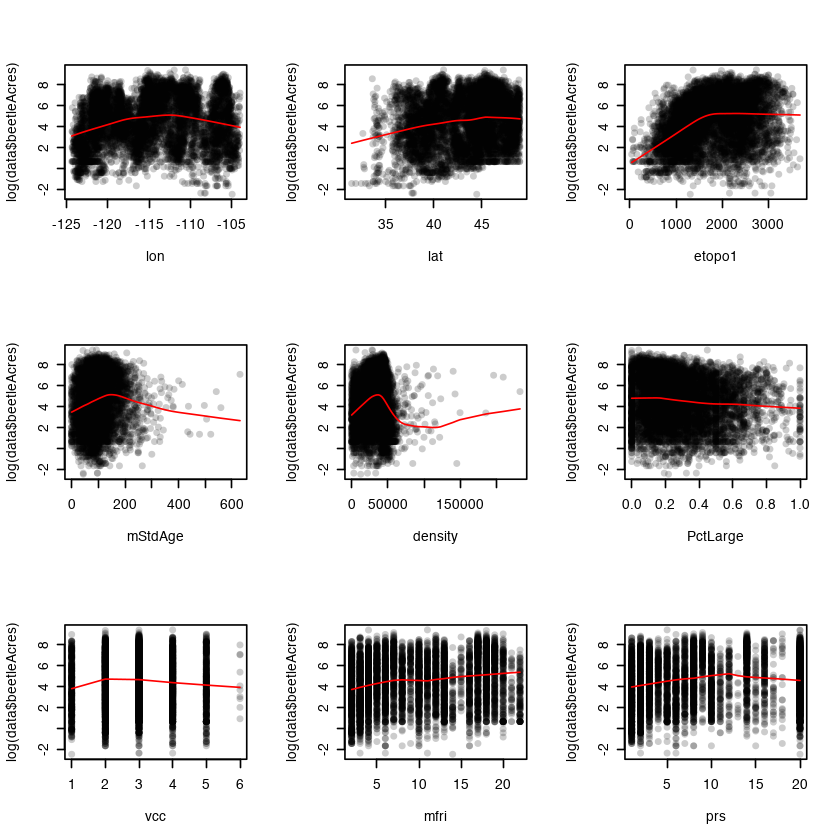

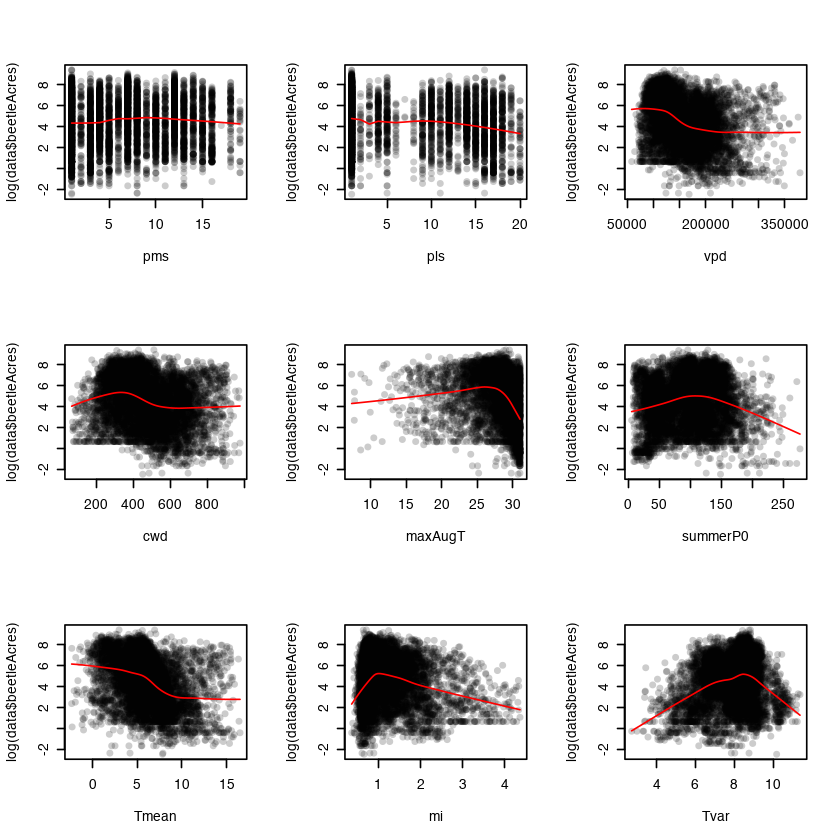

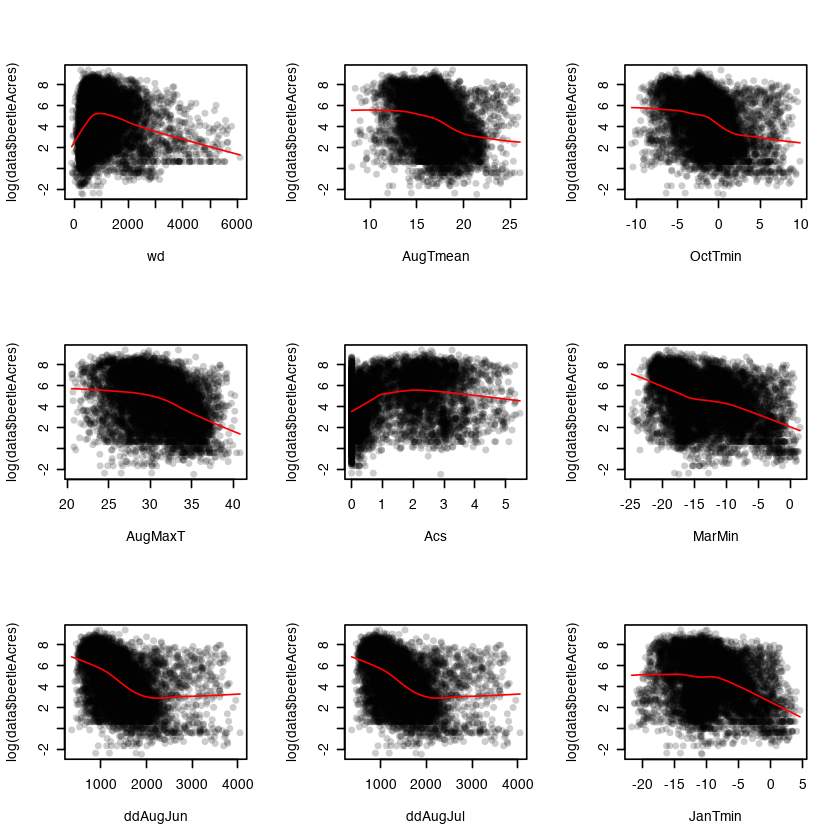

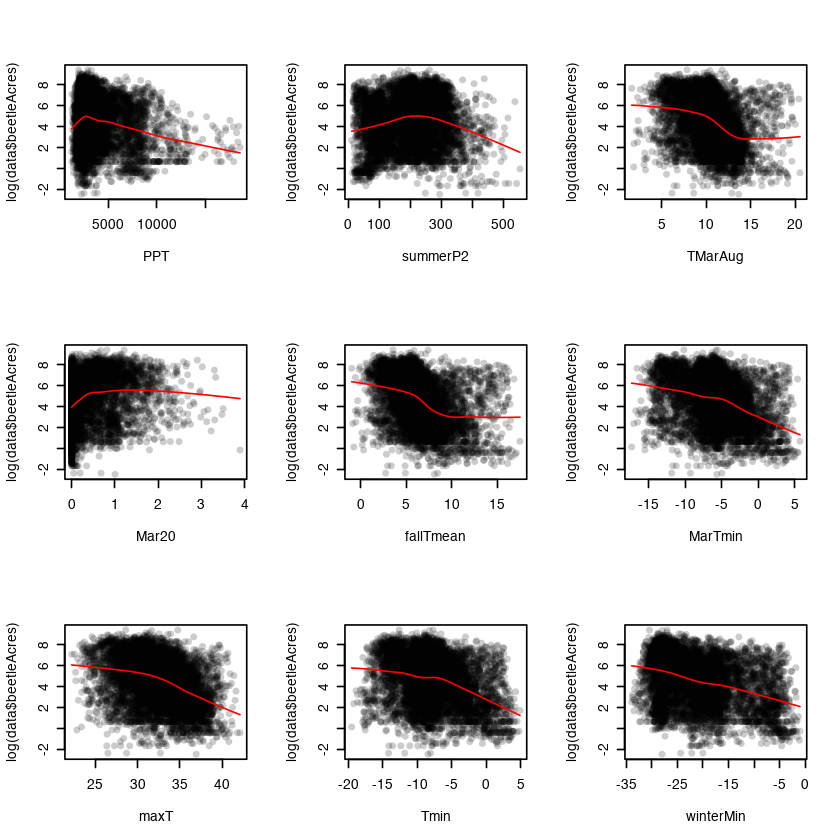

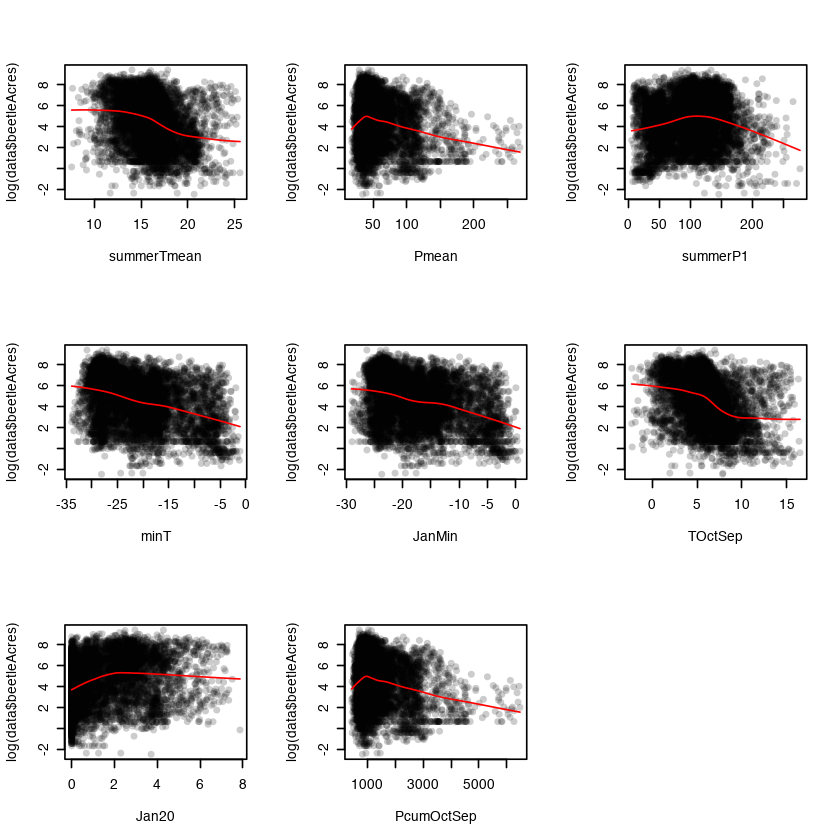

In [7]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [10]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [11]:
mod.r <- step(mod, trace=0)

In [12]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + PctLarge + PctOld + log(vcc) + mfri + log(mfri) + 
    prs + I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + 
    maxAugT + I(maxAugT^2) + I(summerP0^2) + summerP0 + Tmean + 
    I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + 
    AugTmax + Acs + I(Acs^2) + ddAugJun + I(ddAugJun^2) + ddAugJul + 
    I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + I(summerP2^2) + 
    TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + 
    exp(fallTmean) + MarTmin + maxT + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + 
    TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2734 -1.0150  0.1362  1.1134  7.9117 

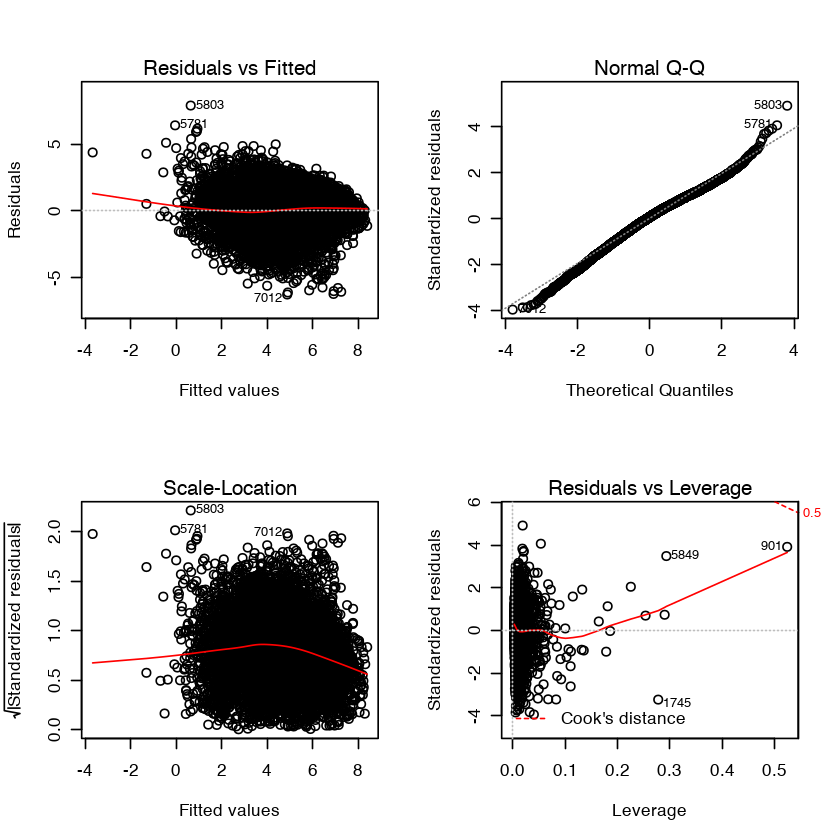

In [13]:
par(mfrow=c(2, 2))
plot(mod.r)

In [14]:
data$preds <- mod.r$fitted

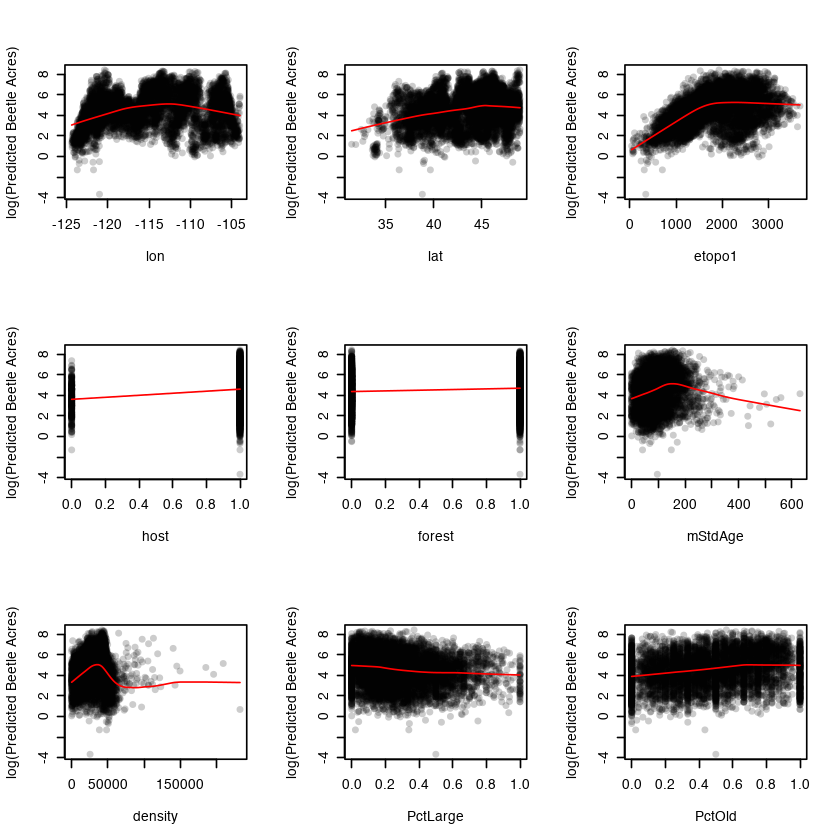

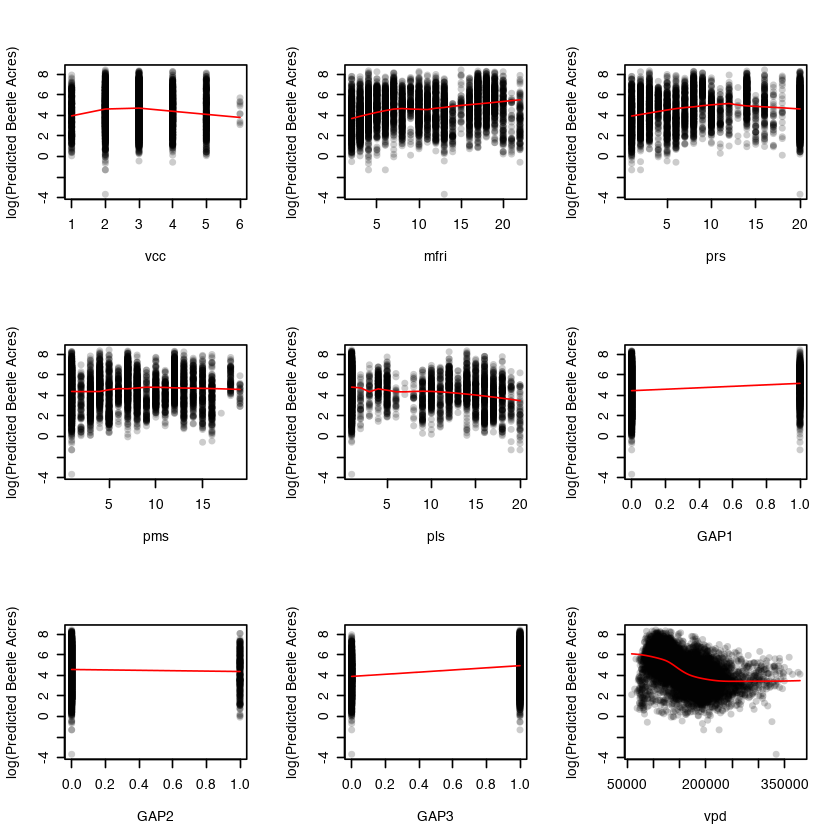

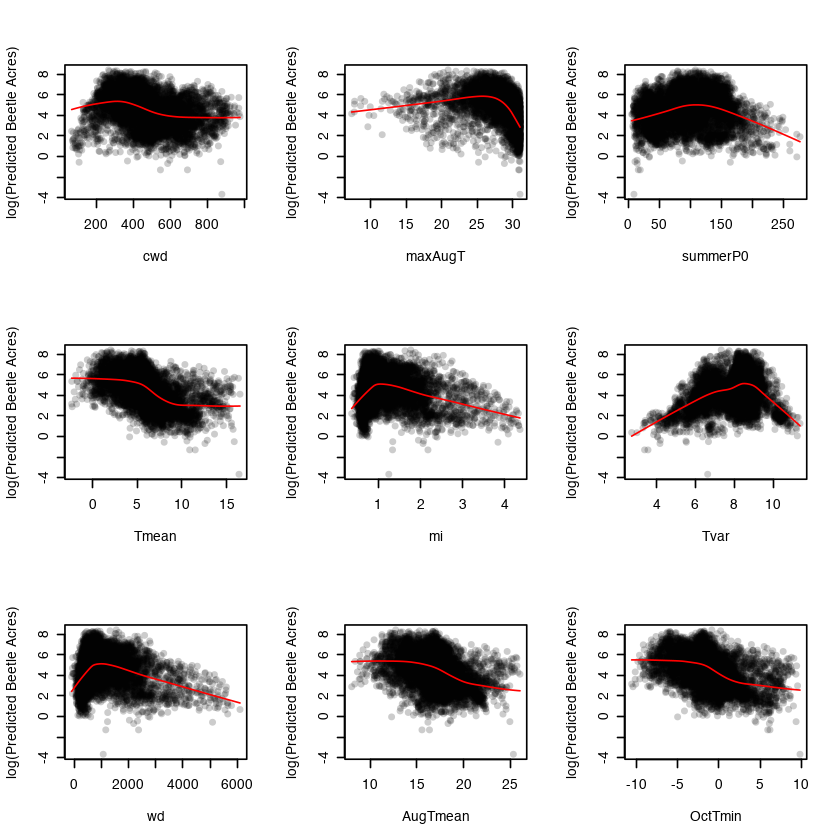

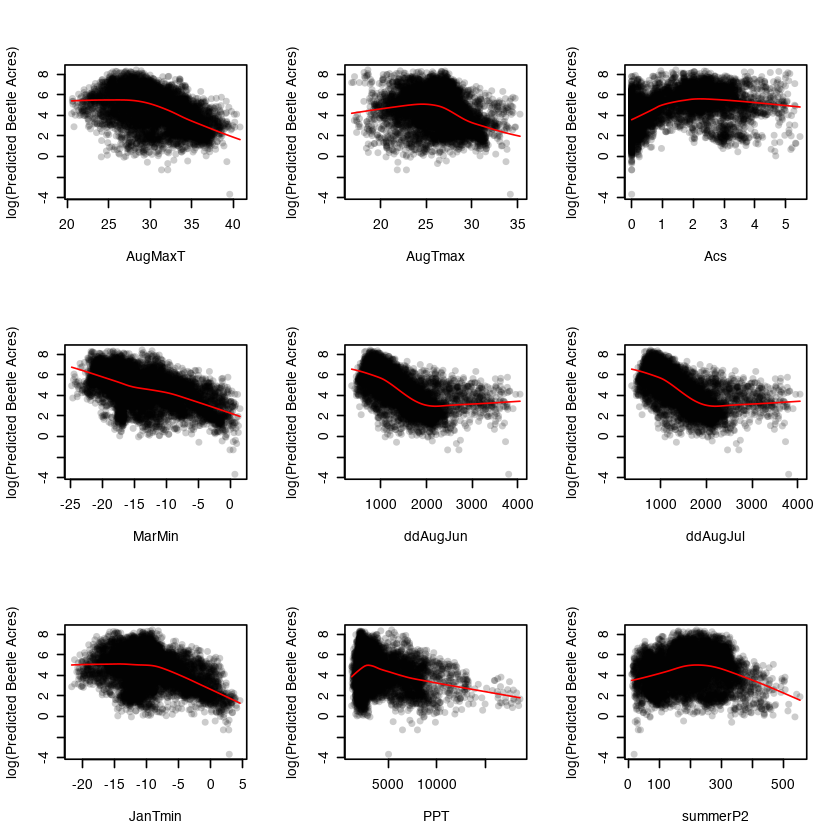

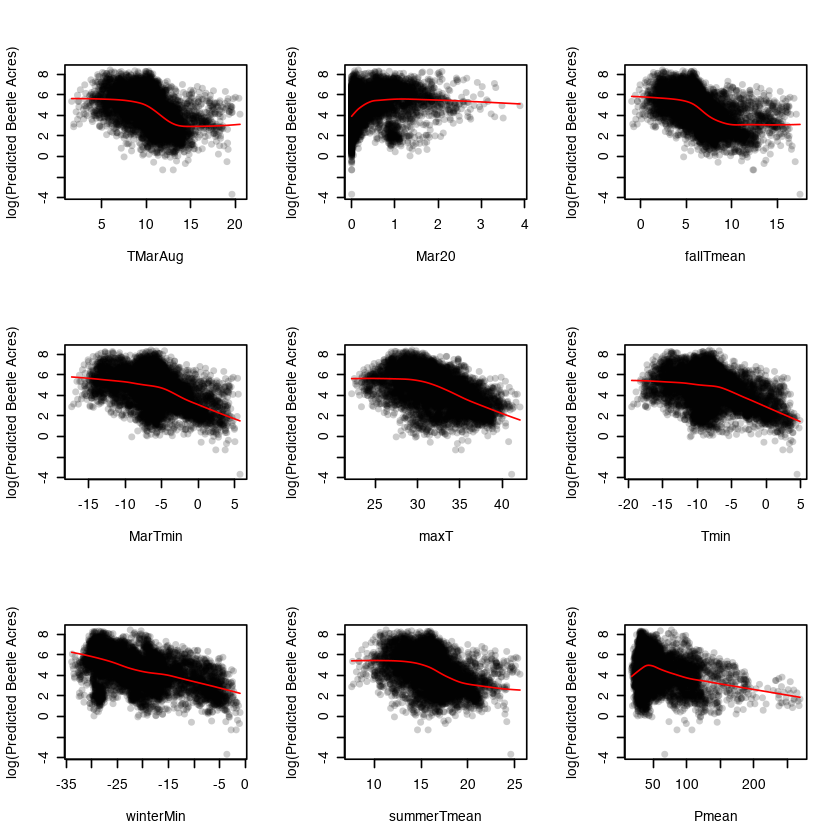

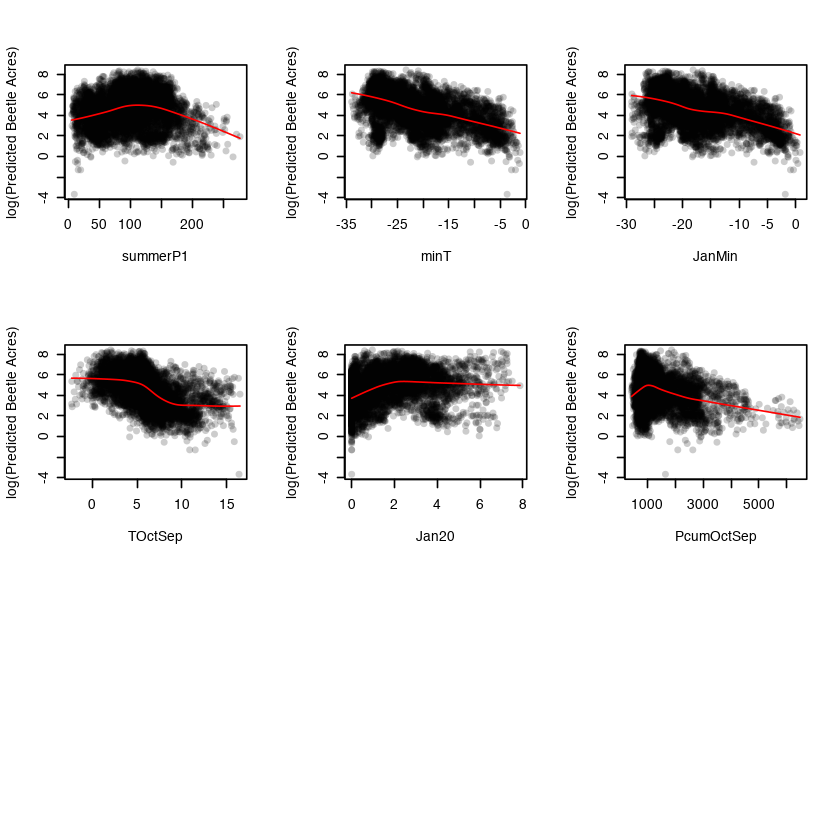

In [16]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', 'preds'))) {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [17]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

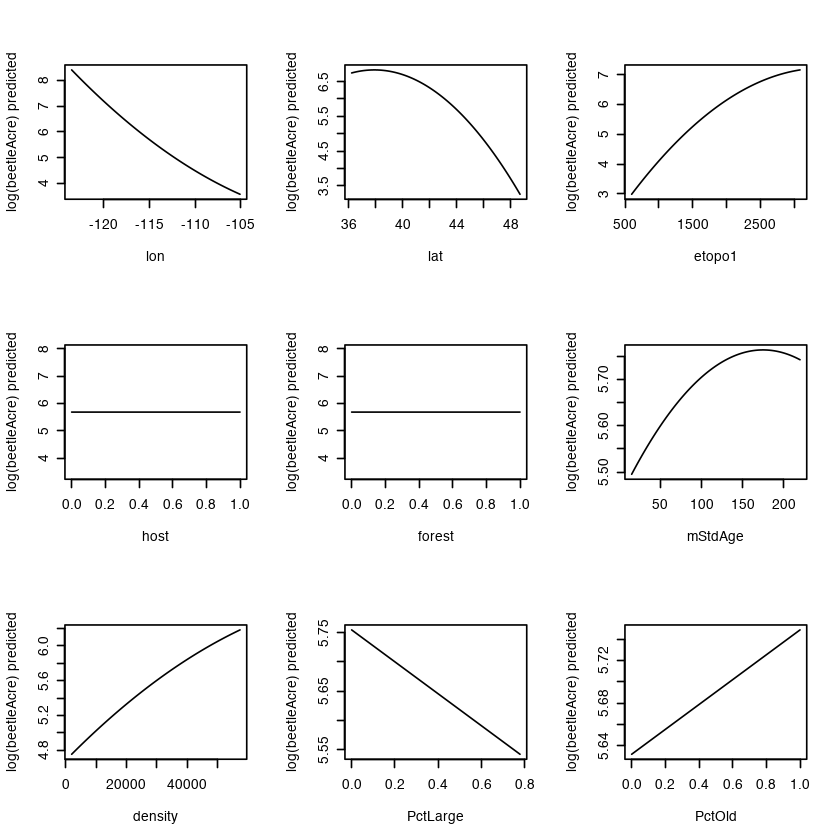

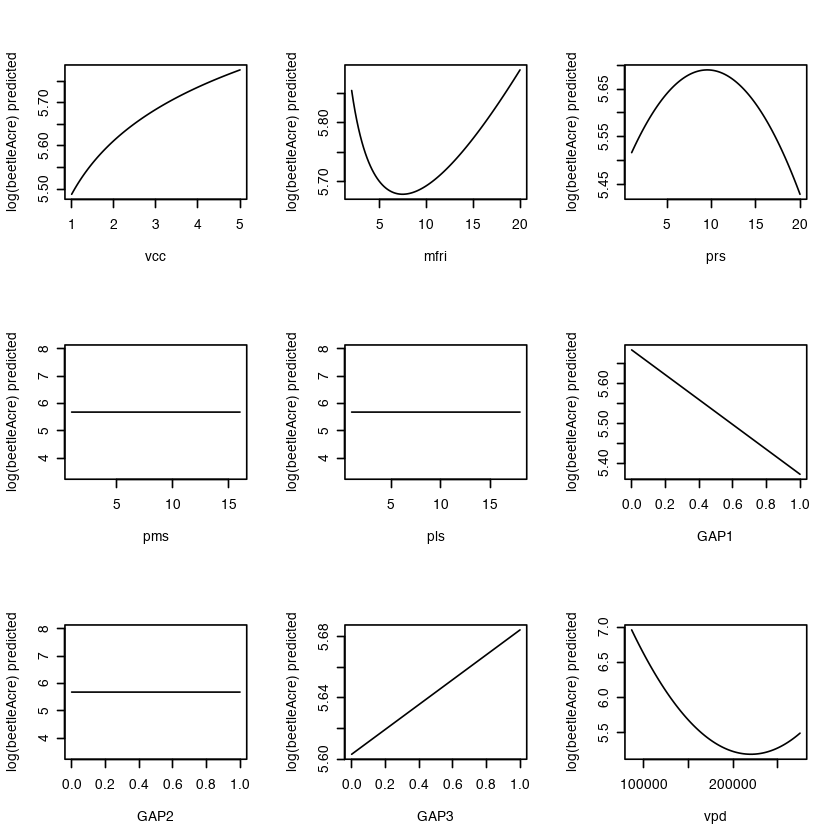

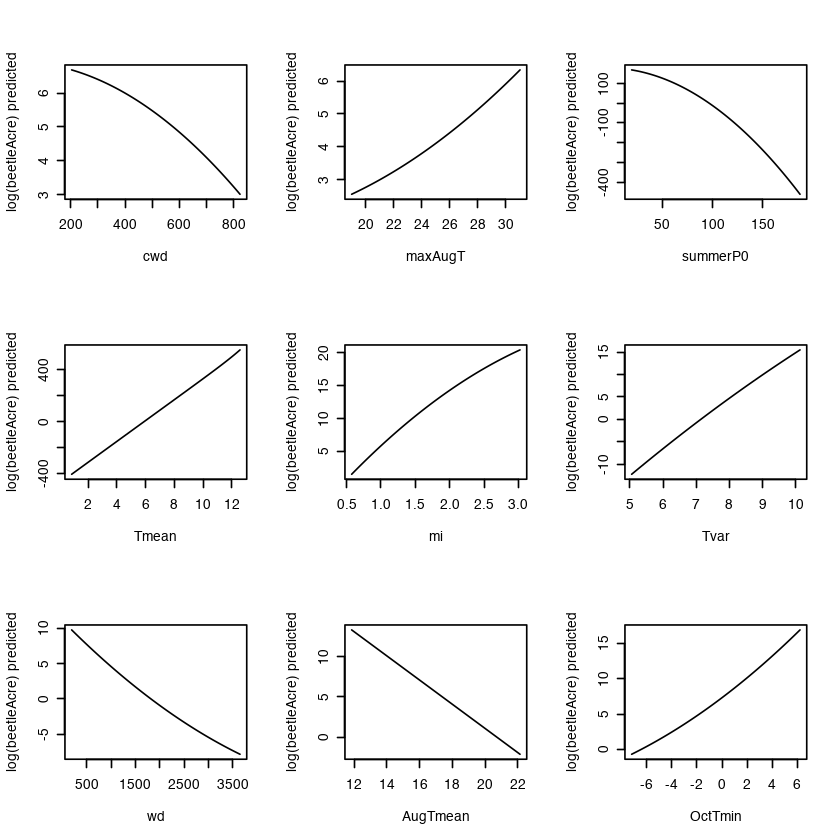

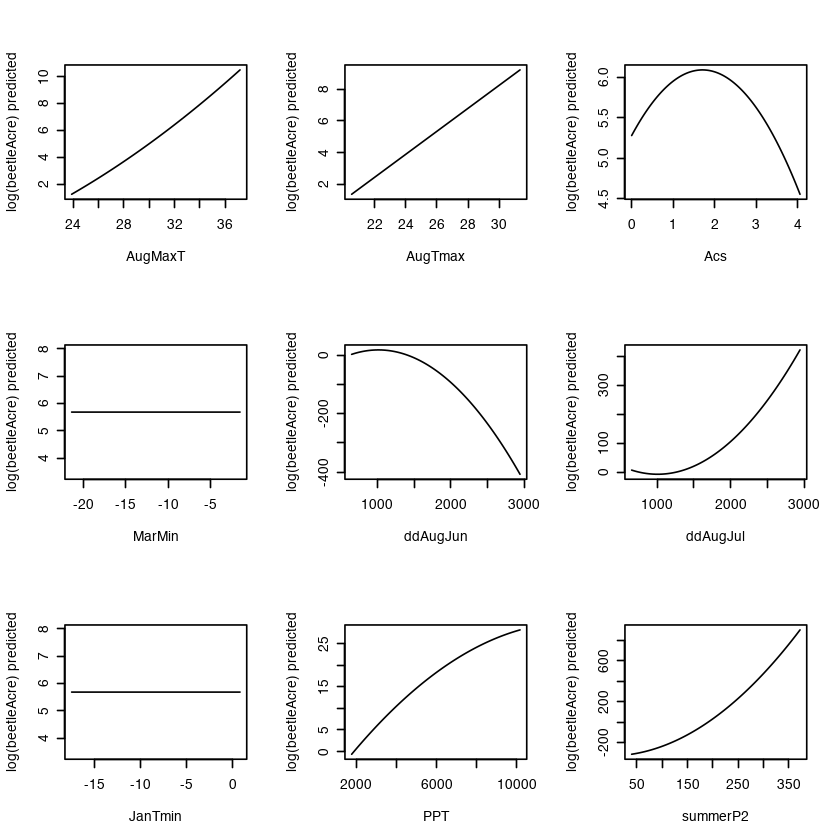

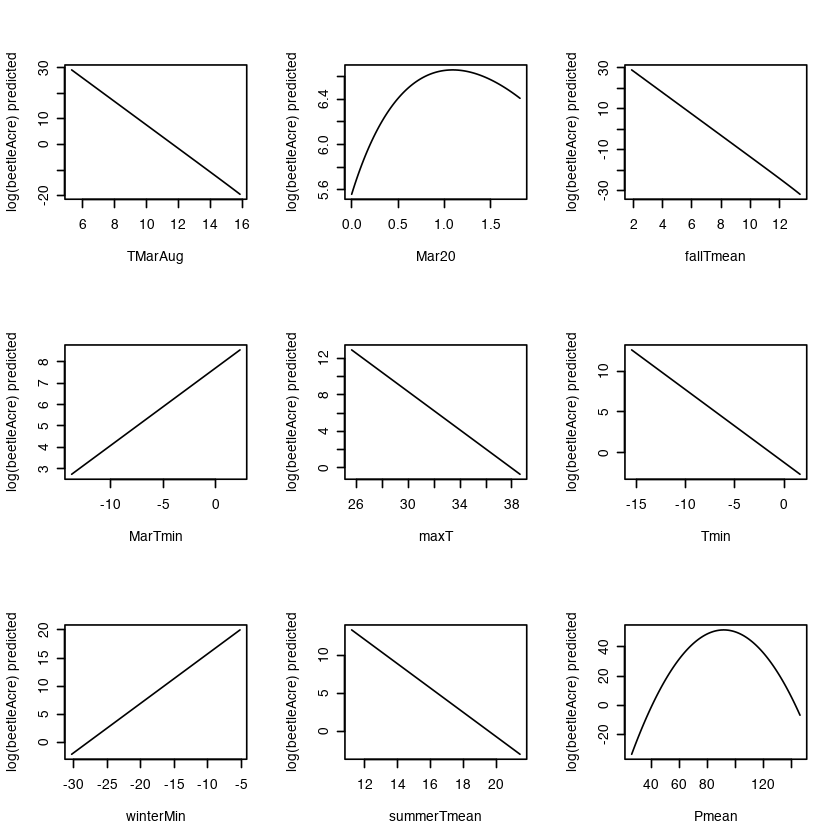

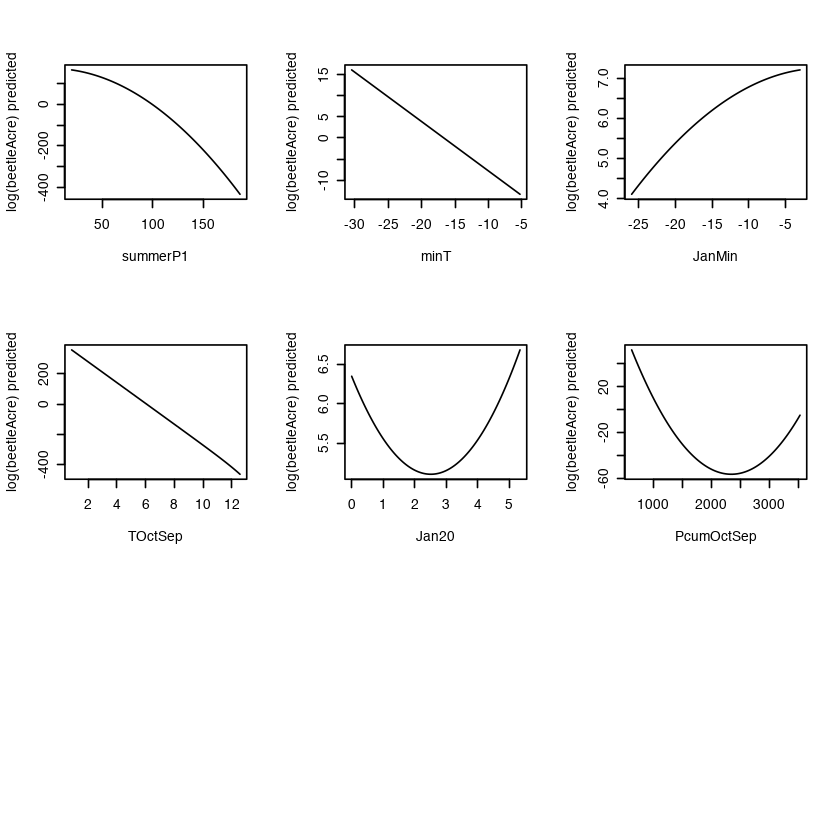

In [18]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

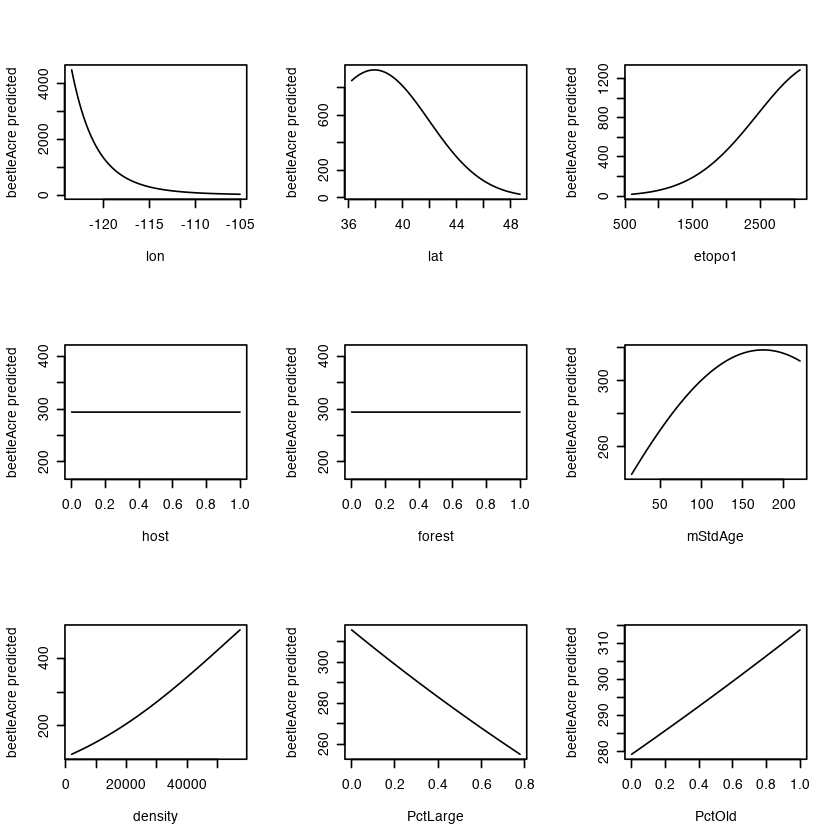

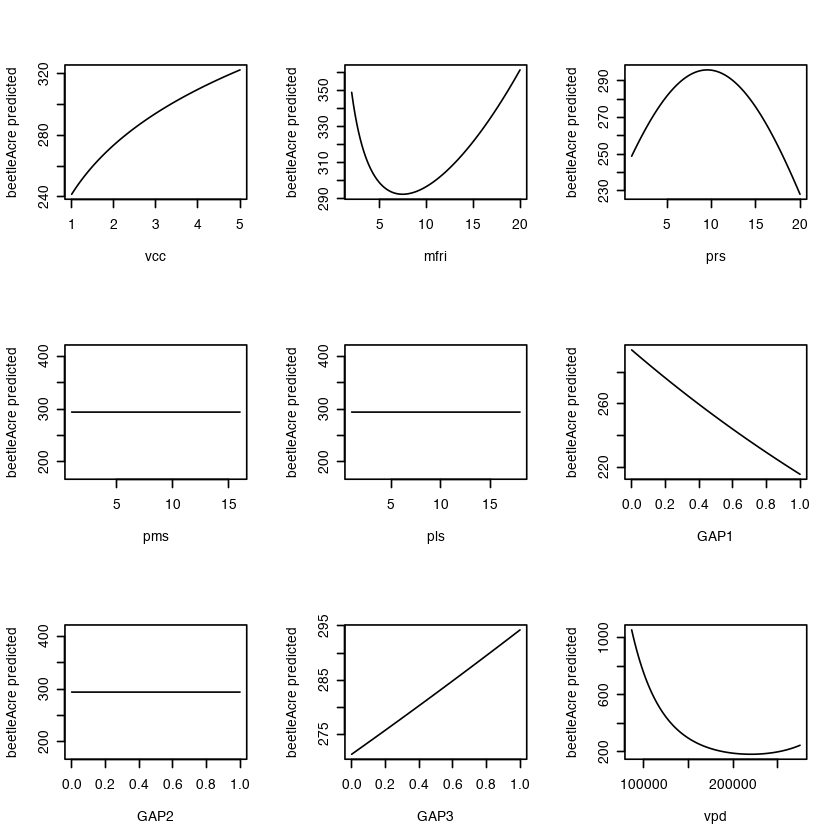

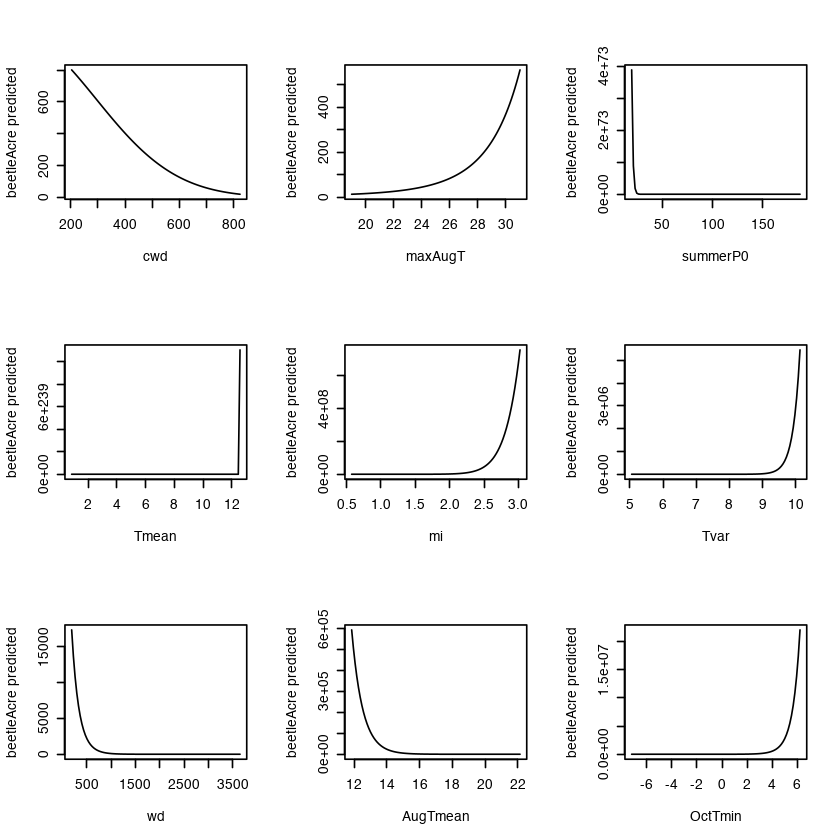

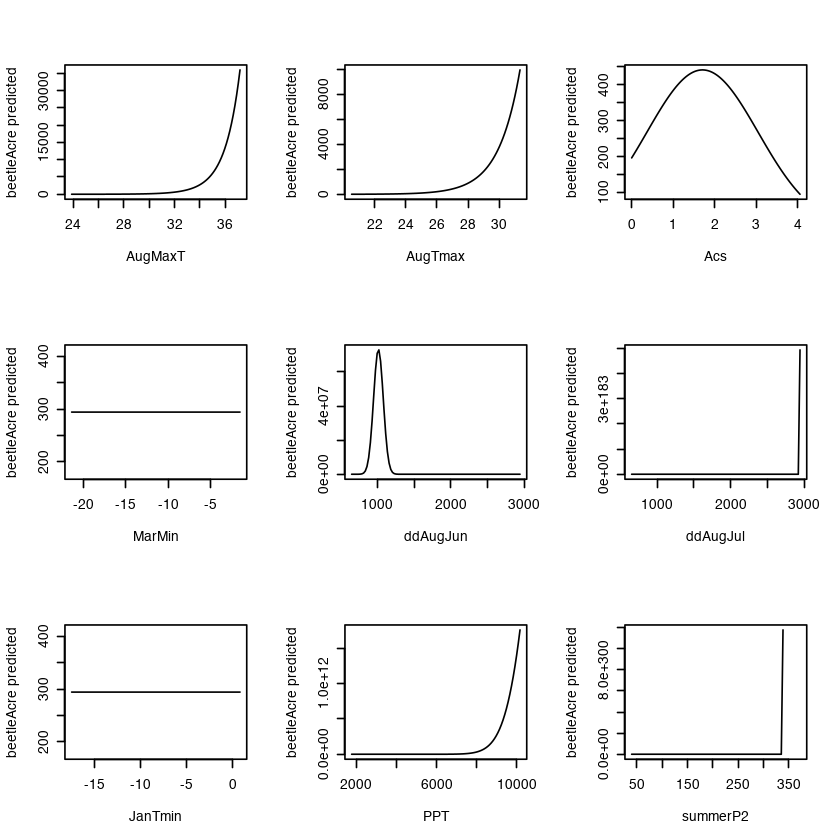

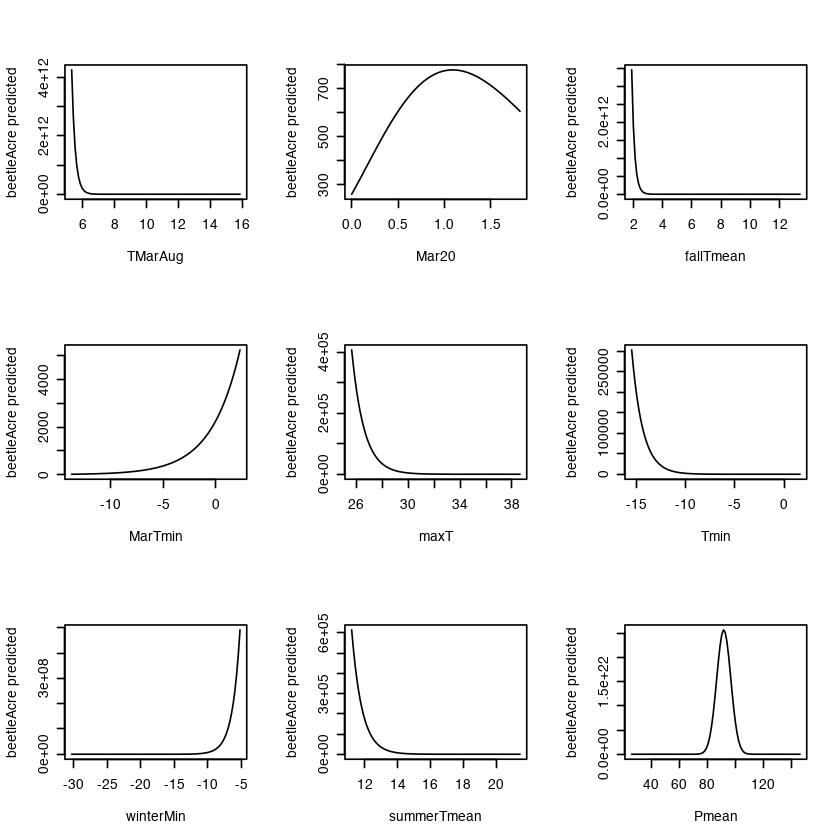

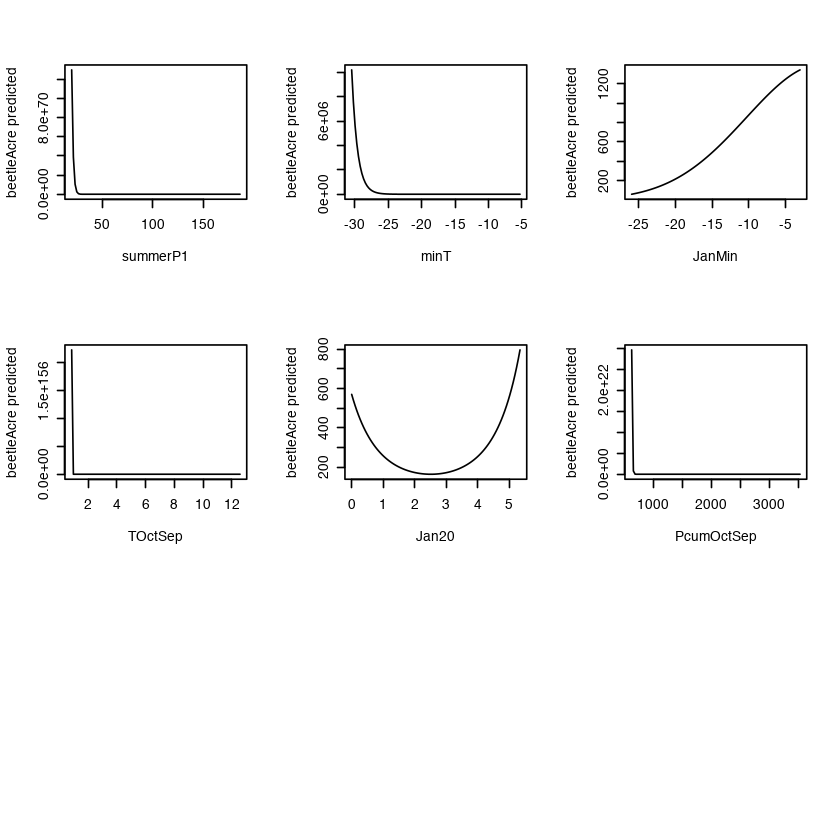

In [19]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [20]:
sq_terms <- c('lat', 'density', 'mStdAge', 'density', 'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 
              'Tmean', 'mi','Tvar', 'wd', 'OctTmin', 'AugMaxT', 'Acs', 'ddAugJun', 'ddAugJul', 
              'PPT', 'summerP2', 'Pmean', 'summerP1', 'JanMin', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lat in a squared term...
Calculated density in a squared term...
Calculated mStdAge in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJun in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated Pmean in a squared term...
Calculated summerP1 in a squared term...
Calculated JanMin in a squared term...
Calculated Jan20 in a squared term...
Calculated PcumOctSep in a squared term...
Calculated Tmean in a exponential te

In [21]:
selected.vars <- c('lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'PctOld', 'mfri', 'prs', 'GAP1', 'GAP3',
                   'vpd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugTmax', 'Acs',
                   'dAugJun', 'ddAugJul', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 'MarTmin', 'maxT',
                   'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'minT', 'TOctSep', 'Jan20', 'PcumOctSep',
                   paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [22]:
mod <- lm(beetleAcres ~ ., data=df)

In [23]:
mod.r <- step(mod, trace=0)

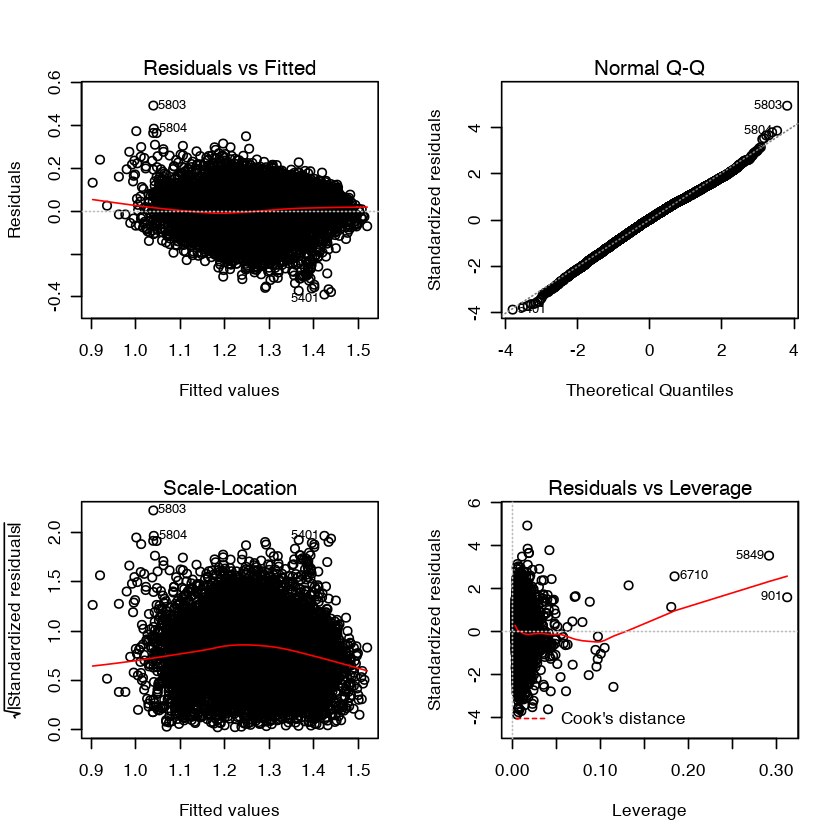

In [31]:
par(mfrow=c(2, 2))
plot(mod.r)

In [24]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    PctLarge + PctOld + GAP1 + GAP3 + vpd + summerP0 + Tmean + 
    mi + Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + ddAugJul + 
    PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + 
    Jan20 + PcumOctSep + lat_sq + density_sq + mStdAge_sq + prs_sq + 
    vpd_sq + cwd_sq + maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + 
    Tvar_sq + wd_sq + OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJun_sq + 
    ddAugJul_sq + PPT_sq + summerP2_sq + Pmean_sq + summerP1_sq + 
    JanMin_sq + Jan20_sq + PcumOctSep_sq + Tmean_exp + fallTmean_exp + 
    Mar20_logp1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4075 -1.0386  0.1223  1.1422  7.6693 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.51186    0.01930 233.769  < 2e-16 ***
lon             -1.51613    0.15133 -10.019  < 2e-16 ***


In [26]:
sort(abs(mod.r$coefficients))

GAP3        PctOld        prs_sq      PctLarge          GAP1 
   0.04287161    0.04368634    0.06817547    0.06956632    0.12244745 
    Tmean_exp    mStdAge_sq       mStdAge fallTmean_exp    density_sq 
   0.14595045    0.19132621    0.21026127    0.25695026    0.28077896 
   OctTmin_sq       density      ddAugJul      Tmean_sq        cwd_sq 
   0.39046785    0.62433264    0.78290793    0.82418920    0.89325740 
   maxAugT_sq        etopo1     JanMin_sq           Acs        Acs_sq 
   1.09344317    1.11726629    1.30989932    1.34344066    1.35480653 
        Mar20           lon         Jan20      Jan20_sq   Mar20_logp1 
   1.45942968    1.51612956    1.60155643    1.64690056    1.75925677 
      AugTmax         wd_sq       MarTmin    AugMaxT_sq        vpd_sq 
   1.86818937    2.08733781    2.29522809    2.43869423    2.57886222 
      Tvar_sq         mi_sq           vpd          maxT       OctTmin 
   2.74505246    3.11051975    3.19242700    3.35837708    4.09469572 
  summerTmean      AugTmean   (Intercept)          Tmin     winterMin 
   4.17880458    4.28493130    4.51186290    4.73379205    6.63161611 
     summerP2        PPT_sq            wd      summerP0            mi 
   6.92328369    7.08018993    7.28520328    7.45269383    8.91874242 
         minT           lat          Tvar        lat_sq       TMarAug 
   9.18907650   10.51669771   10.65600624   11.75959193   14.85603723 
    fallTmean           PPT   ddAugJul_sq   ddAugJun_sq      Pmean_sq 
  15.01012645   15.74613976   57.67394710   58.27865340  125.40870177 
        Pmean PcumOctSep_sq    PcumOctSep   summerP1_sq   summerP0_sq 
 128.01927930  134.38510281  146.11547115  199.93361592  200.18750745 
      TOctSep         Tmean   summerP2_sq 
 218.84646669  256.01731775  400.03761039

In [29]:
library(rcompanion)
y <- data[,'beetleAcres']
y.tuk <- transformTukey(sample(y,5000),plotit=FALSE)


    lambda     W Shapiro.p.value
403   0.05 0.982        1.01e-24

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



In [27]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.05
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    PctLarge + PctOld + prs + GAP1 + GAP3 + vpd + summerP0 + 
    Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + 
    ddAugJul + PPT + TMarAug + Mar20 + fallTmean + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + 
    Jan20 + PcumOctSep + lat_sq + density_sq + mStdAge_sq + prs_sq + 
    vpd_sq + cwd_sq + maxAugT_sq + summerP0_sq + Tmean_sq + mi_sq + 
    Tvar_sq + wd_sq + OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJun_sq + 
    ddAugJul_sq + PPT_sq + summerP2_sq + Pmean_sq + summerP1_sq + 
    JanMin_sq + Jan20_sq + PcumOctSep_sq + fallTmean_exp + Mar20_logp1, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38879 -0.06581  0.00468  0.07088  0.49428 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.261209   0.001191 1058.755  < 2e-16 ***
lon            -0.102775   0.009040  -11.369  < 2e-16 ***
lat 

In [30]:
sort(abs(mod.r$coefficients))

PctOld          GAP3      PctLarge fallTmean_exp          GAP1 
  0.002701602   0.002786864   0.004552566   0.007423589   0.008324371 
          prs    mStdAge_sq       mStdAge        prs_sq    density_sq 
  0.011083325   0.012556129   0.013627798   0.014787185   0.017885563 
   OctTmin_sq      summerP0       density      Tmean_sq      ddAugJul 
  0.022472849   0.036493256   0.039818385   0.042955596   0.052754752 
       cwd_sq    maxAugT_sq        etopo1     JanMin_sq        Acs_sq 
  0.058673760   0.069342076   0.069930561   0.079144577   0.088912168 
          Acs         Mar20           lon      Jan20_sq         Jan20 
  0.091647692   0.095539422   0.102775292   0.108815966   0.112179720 
  Mar20_logp1       AugTmax         wd_sq       MarTmin    AugMaxT_sq 
  0.117563603   0.124946962   0.130479697   0.131521790   0.149008914 
       vpd_sq       Tvar_sq         mi_sq           vpd          maxT 
  0.160094751   0.168770920   0.192021430   0.202540810   0.206059303 
      OctTmin          Tmin   summerTmean      AugTmean        PPT_sq 
  0.262514528   0.273439123   0.273439573   0.278264813   0.420293708 
    winterMin            wd            mi          minT          Tvar 
  0.423360662   0.455021368   0.553132060   0.586886443   0.659745224 
          lat        lat_sq       TMarAug     fallTmean           PPT 
  0.671791229   0.757137099   0.878252761   0.936232720   0.965480109 
  (Intercept)   ddAugJul_sq   ddAugJun_sq      Pmean_sq         Pmean 
  1.261209103   3.075284535   3.114096850   7.908497841   8.292898092 
PcumOctSep_sq    PcumOctSep   summerP1_sq   summerP0_sq       TOctSep 
  8.446840032   9.406281390  12.315765090  12.540781572  12.899922027 
        Tmean   summerP2_sq 
 15.163716557  24.855237944